In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import bootcampviztools as bt
from utils import toolbox_ML as tl

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

from catboost import CatBoostRegressor
from xgboost import XGBRegressor

### Project objective 

The objective of this project is to create an ML model that allows predicting the sale price of a house taking into account a series of features. To achieve the objective we will perform a supervised regression model.

### Extraction and understanding of the data

The data has been obtained from a **Kaggle dataset**: [Data link](https://www.kaggy.com/datasets/harlfoxem/HousesPrediction/data).

The data contains information on the sale of homes in King County, Washington from May 2014 to May 2015. To have the data in a more accessible way when handling them they have been stored in the `Data` folder, as well as other possible versions of the data in which data has been removed or added.

The models that will be used and compared are: **Random Forest Regressor**, **XGBoost Regressor** and **CatBoost Regressor**.

In [ ]:
df = pd.read_csv('./data/kc_house_data.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [42]:
pd.options.display.float_format = '{:.3f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.000,4580301520.865,2876565571.312,1000102.000,2123049194.000,3904930410.000,7308900445.000,9900000190.000
price,21613.000,540088.142,367127.196,75000.000,321950.000,450000.000,645000.000,7700000.000
bedrooms,21613.000,3.371,0.930,0.000,3.000,3.000,4.000,33.000
bathrooms,21613.000,2.115,0.770,0.000,1.750,2.250,2.500,8.000
sqft_living,21613.000,2079.900,918.441,290.000,1427.000,1910.000,2550.000,13540.000
sqft_lot,21613.000,15106.968,41420.512,520.000,5040.000,7618.000,10688.000,1651359.000
floors,21613.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,21613.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21613.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21613.000,3.409,0.651,1.000,3.000,3.000,4.000,5.000


It can be seen that the data type of the dataset columns are ` int` and `float`, that is, numerical type. The Dataset has a total of 21 columns and a total of 21613 rows (or instances). It does not present null values. 

We find an `object` type column: **date**. This column indicates the date on which the sale was made.

As for the description of the `Price` column values ​​we can see that 75% of prices are below $645,000, while the maximum value is found at $7,700,000, something that may indicate outliers values ​​in our Target variable. We can also find this in the `Bathrooms` column where there is a maximum value of 33 bathrooms while 75% are below 4 bathrooms.

The `Waterfront` variable is a binary variable **, since both in its quartiles and at its maximum and minimum the only values ​​we find are 0 and 1.

We are going to make an informative table to be able to understand in a simpler way what each variable represents.

| Variable | Type | Description | Notes |
| ------------- | -------- | ----------- | ------ |
| ID | int64 | Single Housing Identifier | It may not be relevant to analysis |
| date | object | Date of sale of housing | Date format may require conversion |
| Price | float64 | Sales price of house in dollars | OBJECTIVE VARIABLE FOR PRICE PREDICTION |
| Bedrooms | int64 | Number of rooms in the house | It can include small bedrooms |
| Bathrooms | float64 | Number of bathrooms in the house | Considered half bathrooms as 0.5 (those who have no shower) |
| sqft_living | int64 | Square meters of habitable housing | Related to the price |
| sqft_lot | int64 | Square meters of the land | Includes garden and other exterior spaces |
| floors | float64 | Number of apartments in the house | It can be decimal if there are mezzanines |
| Waterfront | int64 | 1 If the house has a view of the water, 0 if no | Binary categorical variable |
| view | int64 | Housing view score (0-4) | 0 Indicates without a view, 4 is the best view |
| condition | int64 | General state of housing (1-5) | 1 is bad, 5 is excellent |
| grade | int64 | Construction quality and finishes (1-13) | Based on construction standards |
| sqft_above | int64 | Square meters of the part on the ground | Excludes basement |
| sqft_basement | int64 | Square meters of basement | 0 If you have no basement |
| yr_built | int64 | Year of housing construction | It can influence the price and status |
| yr_renovated | int64 | Year of the last renewal, 0 if it has never been renewed | It can affect the value of housing |
| zipcode | int64 | Location postal code | It can be used for geospatial analysis |
| Latin | float64 | Latitude of the house | Geographical coordinate |
| long | float64 | Housing length | Geographical coordinate |
| sqft_living15 | int64 | Average square meters of nearby homes | Neighborhood value indicator |
| sqft_lot15 | int64 | Average square meters in the area | It can influence the price |

In [ ]:
'''Change sale date format'''
df = df.rename({'date':'sale_date'}, axis = 1)
df['sale_date'] = pd.to_datetime(df['sale_date'], yearfirst=True)

#### Cardinality, Missing values ​​and type of variable.

Although we have already made an informative table of each variable above, the following table will provide us with information on the cardinality of the variables, the number of unique values, percentage of Missing values ​​and the type of variable. This information is useful for the analysis of the variables and how to treat them.

In [44]:
tl.describe_df(df)

,columna,tipo,%_nulos,valores_unicos,%_cardinalidad
0,id,int64,0.000,21436,99.180
1,sale_date,datetime64[ns],0.000,372,1.720
2,price,float64,0.000,4028,18.640
3,bedrooms,int64,0.000,13,0.060
4,bathrooms,float64,0.000,30,0.140
5,sqft_living,int64,0.000,1038,4.800
6,sqft_lot,int64,0.000,9782,45.260
7,floors,float64,0.000,6,0.030
8,waterfront,int64,0.000,2,0.010
9,view,int64,0.000,5,0.020


We can see that there are some categorical variables such as `Waterfront` being this binary and already mentioned above, `Floor` with 6 unique values, `view` with 5 unique values,`Condition` 'with 5 unique values. The features `Bedrooms` and `Grade`, but we will see it later in Features's analysis as categorical.

The ID column does not contain 100% of cardinality, but it is very close. This indicates that there are some indices that are duplicated in the DF, something that is not common since the ID should be a unique identifier.

In [45]:
df['id'].duplicated().value_counts()

id
False    21436
True       177
Name: count, dtype: int64

There are a total of 177 IDS that are duplicated (1%).

In [46]:
df.loc[df['id'].duplicated(keep=False)].sort_values(by = 'id', ascending=False).head()

,id,sale_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1085,9834200885,2014-07-17,360000.000,4,2.500,2080,4080,1.000,0,0,...,7,1040,1040,1962,0,98144,47.572,-122.290,1340,4080
1086,9834200885,2015-04-20,550000.000,4,2.500,2080,4080,1.000,0,0,...,7,1040,1040,1962,0,98144,47.572,-122.290,1340,4080
15199,9834200305,2014-07-16,350000.000,3,1.000,1790,3876,1.500,0,0,...,7,1090,700,1904,0,98144,47.575,-122.288,1360,4080
15200,9834200305,2015-02-10,615000.000,3,1.000,1790,3876,1.500,0,0,...,7,1090,700,1904,0,98144,47.575,-122.288,1360,4080
6345,9828200460,2014-06-27,260000.000,2,1.000,700,4800,1.000,0,0,...,7,700,0,1922,0,98122,47.615,-122.300,1440,4800


Seeing the IDs repeated in the DF we observe that the only columns that change are the sale date and the sale price, this indicates that there are homes that have been sold more than once during this period of time.

To know the number of times that a house has been sold we will create a new column called `sales' that will count the number of times based on how many times the ID is repeated.

In [47]:
df['ventas'] = df.groupby('id')['id'].transform('count')
df[df['ventas'] > 1]
df.ventas.value_counts()

ventas
1    21260
2      350
3        3
Name: count, dtype: int64

There are a total of 170 houses that have been sold 2 times and there is a house that has been sold a total of 3 times.

As our main objective is to predict the price of a house in an initial way we will keep the first registration of the sale of the house and eliminate the rest since the future sales have been conditioned by the previous price of the same.

In [48]:
df = df.drop_duplicates(subset=['id'], keep='first')
df.ventas.value_counts()

ventas
1    21260
2      175
3        1
Name: count, dtype: int64

We will use the date of sale of homes as a DATASET index since it will not provide us with greater use for the model. We will erase the ID of the homes since it will not help us for the creation of the model.

In [49]:
df = df.set_index('sale_date')
df = df.drop(columns='id', axis = 1)

In [50]:
bedrooms_33 = df[df['bedrooms'] == 33].index
df = df.drop(bedrooms_33)

In [51]:
df_limpio = df.to_csv('./data/df_limpio_modelo.csv')

### Data analysis

Once we have established a business objective, extracted, understood and cleaned the data, we begin with the analysis of the variables, both of the `target` variable (price in our case) and the rest of the variables. 

To start with the analysis we will recover the new dataset with all the changes we have made previously, which is the `data` folder.
- We eliminate the `sales` column since it is no longer necessary.
- We establish again `Sale_date` as our index.

In [52]:
df = pd.read_csv("./data/df_limpio_modelo.csv")
df = df.drop(columns='ventas', axis = 1)
df = df.set_index('sale_date')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
sale_date,,,,,,,,,,,,,,,,,,,
2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


Once we have recovered our dataset, we will divide the data into two groups:
- `Train Set`. This set will help us visualize the data and perform the necessary transformations. It will also be the set with which we will train our model / models.
- `Test Set` test. We will keep this set and use it against the results obtained in our model to know how precise it is.

In [ ]:
target = "price"

In [54]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

### Analysis of the `target` variable
We perform an analysis of our Target variable to know the type of distribution it has.

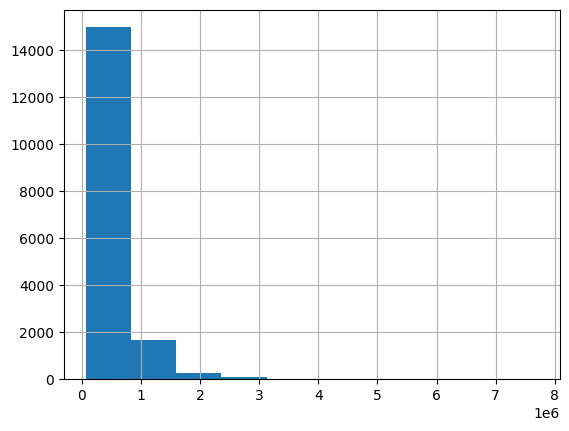

In [55]:
train_set[target].hist();

Our Target variable does not follow a normal distribution and presents a tail to the right.

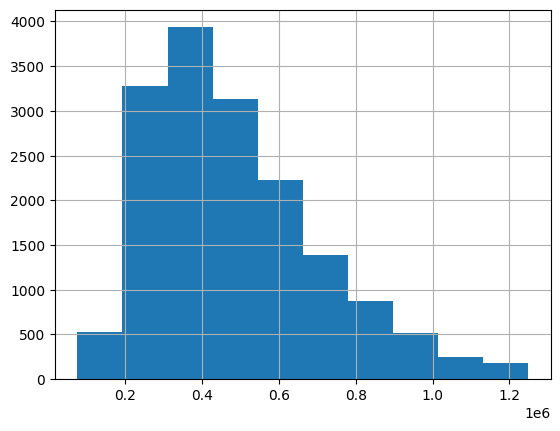

In [56]:
precios_bajos = train_set.loc[train_set[target] < 1250000]
precios_bajos[target].hist();

It is also observed that most houses have a price between 200,000 and 1,000,000 dollars. There are some houses that exceed these prices, reaching a maximum value of almost 8,000,000 dollars. This is not the ideal distribution for a linear regression model.

## Analysis of features
Now we will perform an analysis of the rest of features found in the DataSet. To perform the analysis we will divide the features into two groups:
- Numerical
- Categorical

With the data of `Lat` and `Long` we can represent things in a geographical way in a graphic having the price of homes as hue. For this graphic representation, the data has been transformed logarithmically so that they are easier to represent.

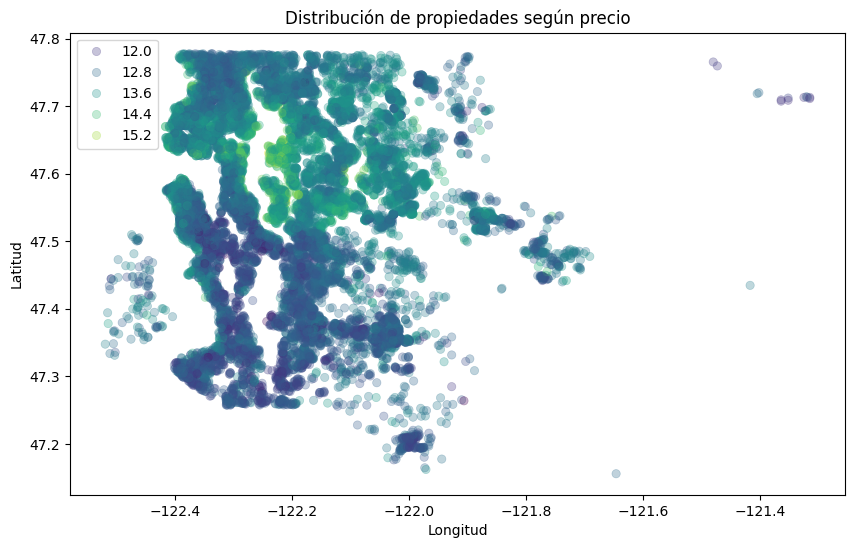

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_set['long'], y=train_set['lat'], alpha=0.3, edgecolor=None, legend=True, hue = np.log(train_set[target]), palette='viridis')

plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Distribución de propiedades según precio")
plt.legend()
plt.show()

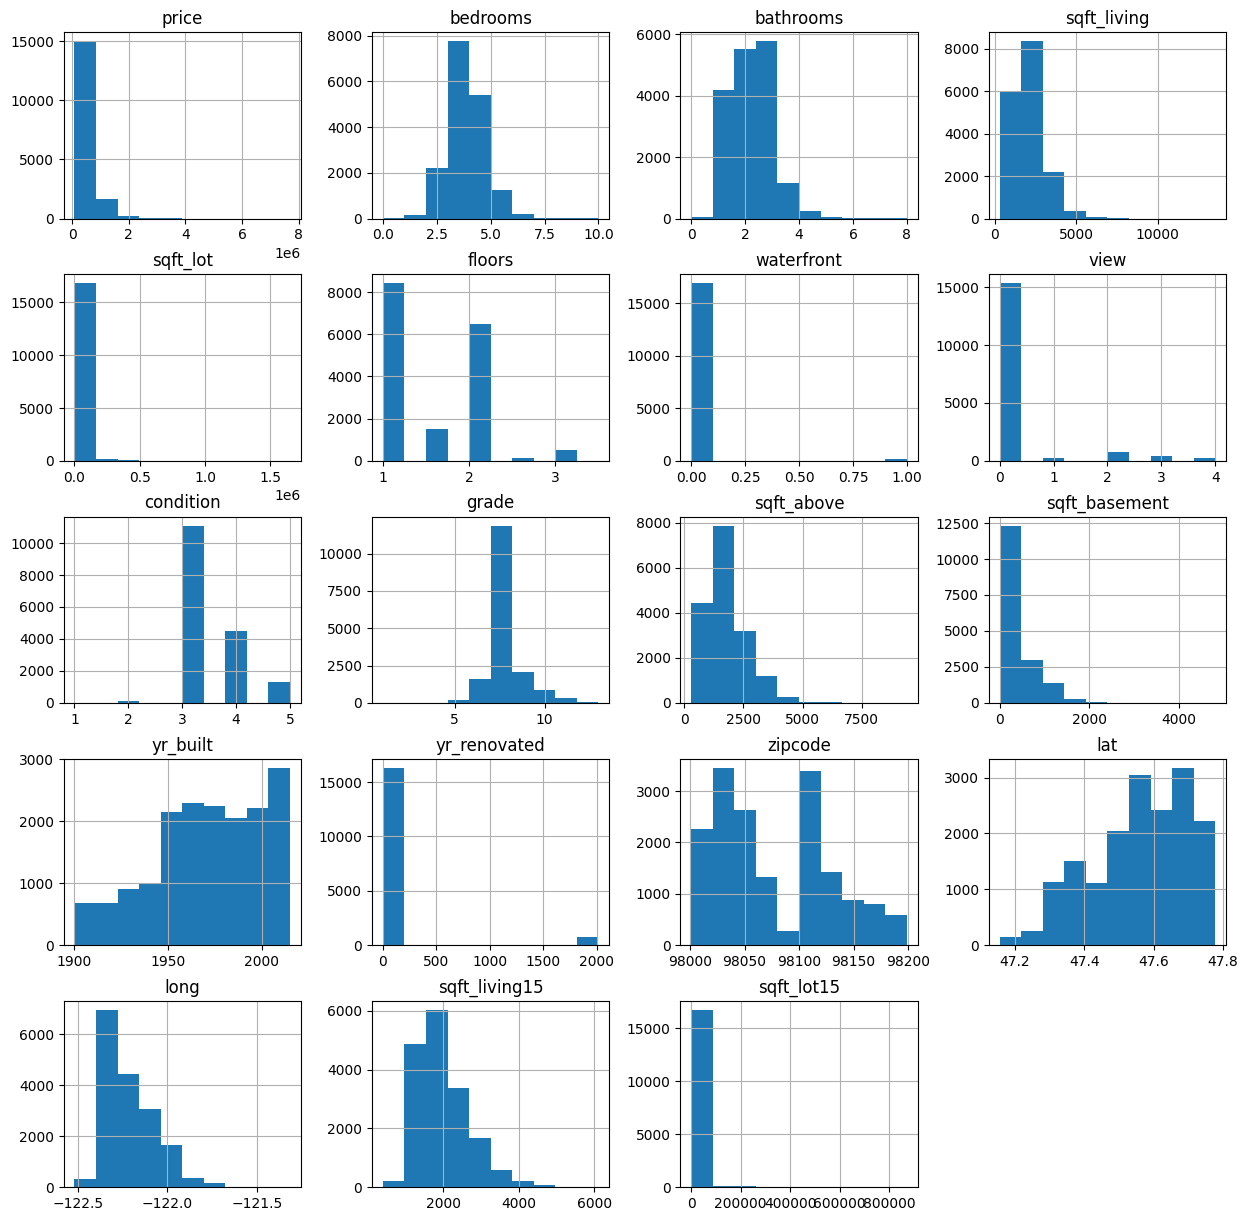

In [58]:
train_set.hist(figsize = (15,15));

The feature `yr_renovated` we will consider it as categorical since 95% of the homes have not been reformed, so we can turn it into a binary categorical.

In [59]:
features = train_set.columns.to_list()
features.remove(target)

In [60]:
cat_features = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_renovated']
num_features = [col for col in train_set.columns if col not in cat_features]

In [61]:
num_features

['price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

### Analysis of the **numerical features**
First we will perform an EDA analysis of the numerical features to know how their distributions are. To do this, we will represent the data visually through boxploots and density histograms.

(11, 2)


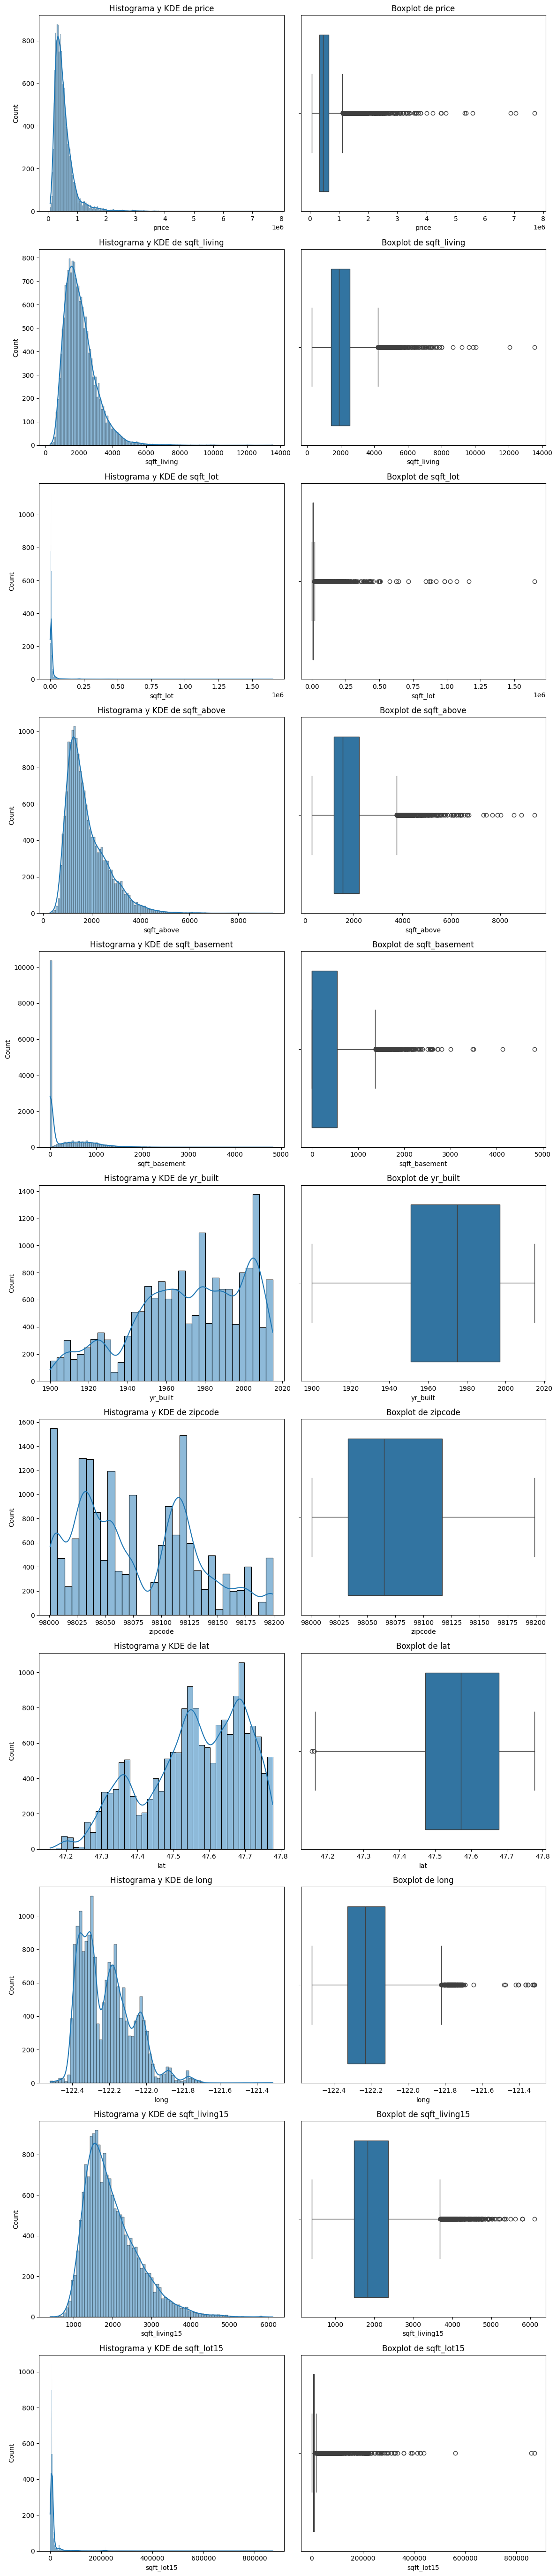

In [62]:
bt.plot_combined_graphs(df = train_set, columns=num_features, whisker_width=1.5)

In the previous graphics it can be seen that all features except `yr_built`,` Zipcode` and `Lat` have a large number of values ​​**outliers**. It will not be necessary to apply transformations to these variables with outliers since trees -based algorithms know how to manage them. Nor will we apply a transformation to the feature `Long` since it is a geographical measure, just like lat.

#### **Numerical features correlation**

We will perform this correlation through the `Pearson` correlation

In [63]:
corr = train_set[num_features].corr()
corr[target].sort_values(ascending = False)

price            1.000
sqft_living      0.705
sqft_above       0.609
sqft_living15    0.586
sqft_basement    0.333
lat              0.303
sqft_lot         0.090
sqft_lot15       0.082
yr_built         0.054
long             0.018
zipcode         -0.057
Name: price, dtype: float64

Most features have a good correlation with the price. To keep the best we will establish a criterion that will consist of having a minimum of correlation to be considered relevant to the model.

In [64]:
pearson_num_features = []
criterio = 0.15
for col in num_features:
    if corr[col][target] > criterio:
        pearson_num_features.append(col)

In [65]:
pearson_num_features

['price', 'sqft_living', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']

##### ** Colinerality **

Once these features have been chosen, we will analyze whether they have some kind of collinearity among them. It is important to know if there is a strong correlation between independent features since they can harm the model. To know the correlation between them we will use a **Heatmap**.

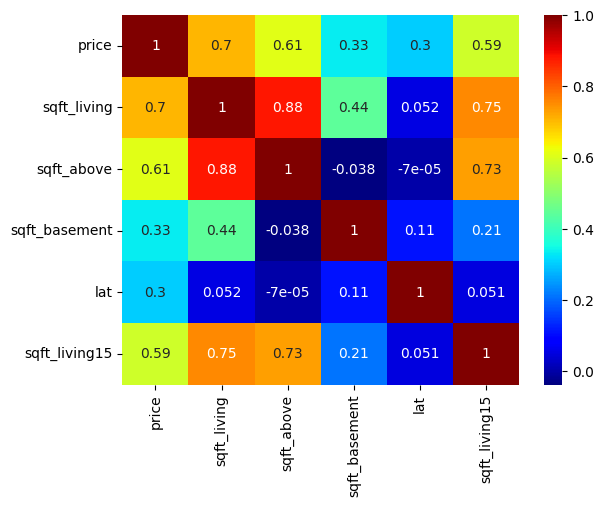

In [66]:
sns.heatmap(data = corr.loc[pearson_num_features, pearson_num_features], annot=True, cmap = 'jet');

These are the colinealities we find:
- `sqft_above` it has colinerality with: sqft_living (88%), sqft_living15 (73%).
- `sqft_living15` has colinerality with: sqft_living (75%).

We will eliminate from the `sqft_above` list since it is the one that presents the greatest colinerality.

In [67]:
pearson_num_features.remove('sqft_above')

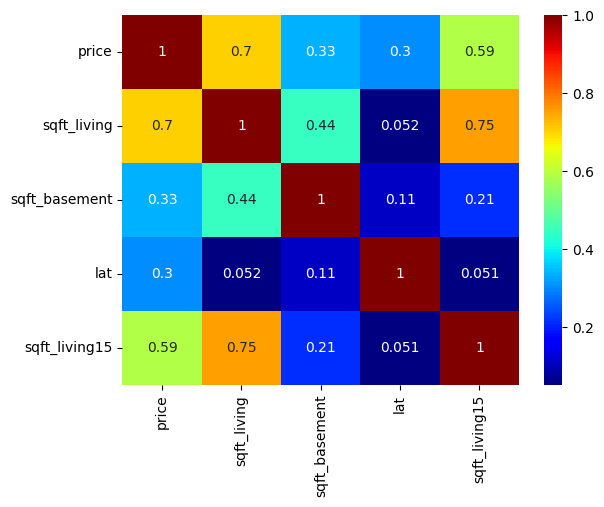

In [68]:
sns.heatmap(data = corr.loc[pearson_num_features, pearson_num_features], annot=True, cmap = 'jet');

These are the numerical features that we will use for our model.

In [69]:
pearson_num_features.remove(target)

In [70]:
pearson_num_features

['sqft_living', 'sqft_basement', 'lat', 'sqft_living15']

### Analysis of the `categorical features`
Once we have analyzed and selected the numerical features, we will carry out the analysis process for the categorical features of the DATASET. For this we will use different visualizations and correlations other than those used with numericals.

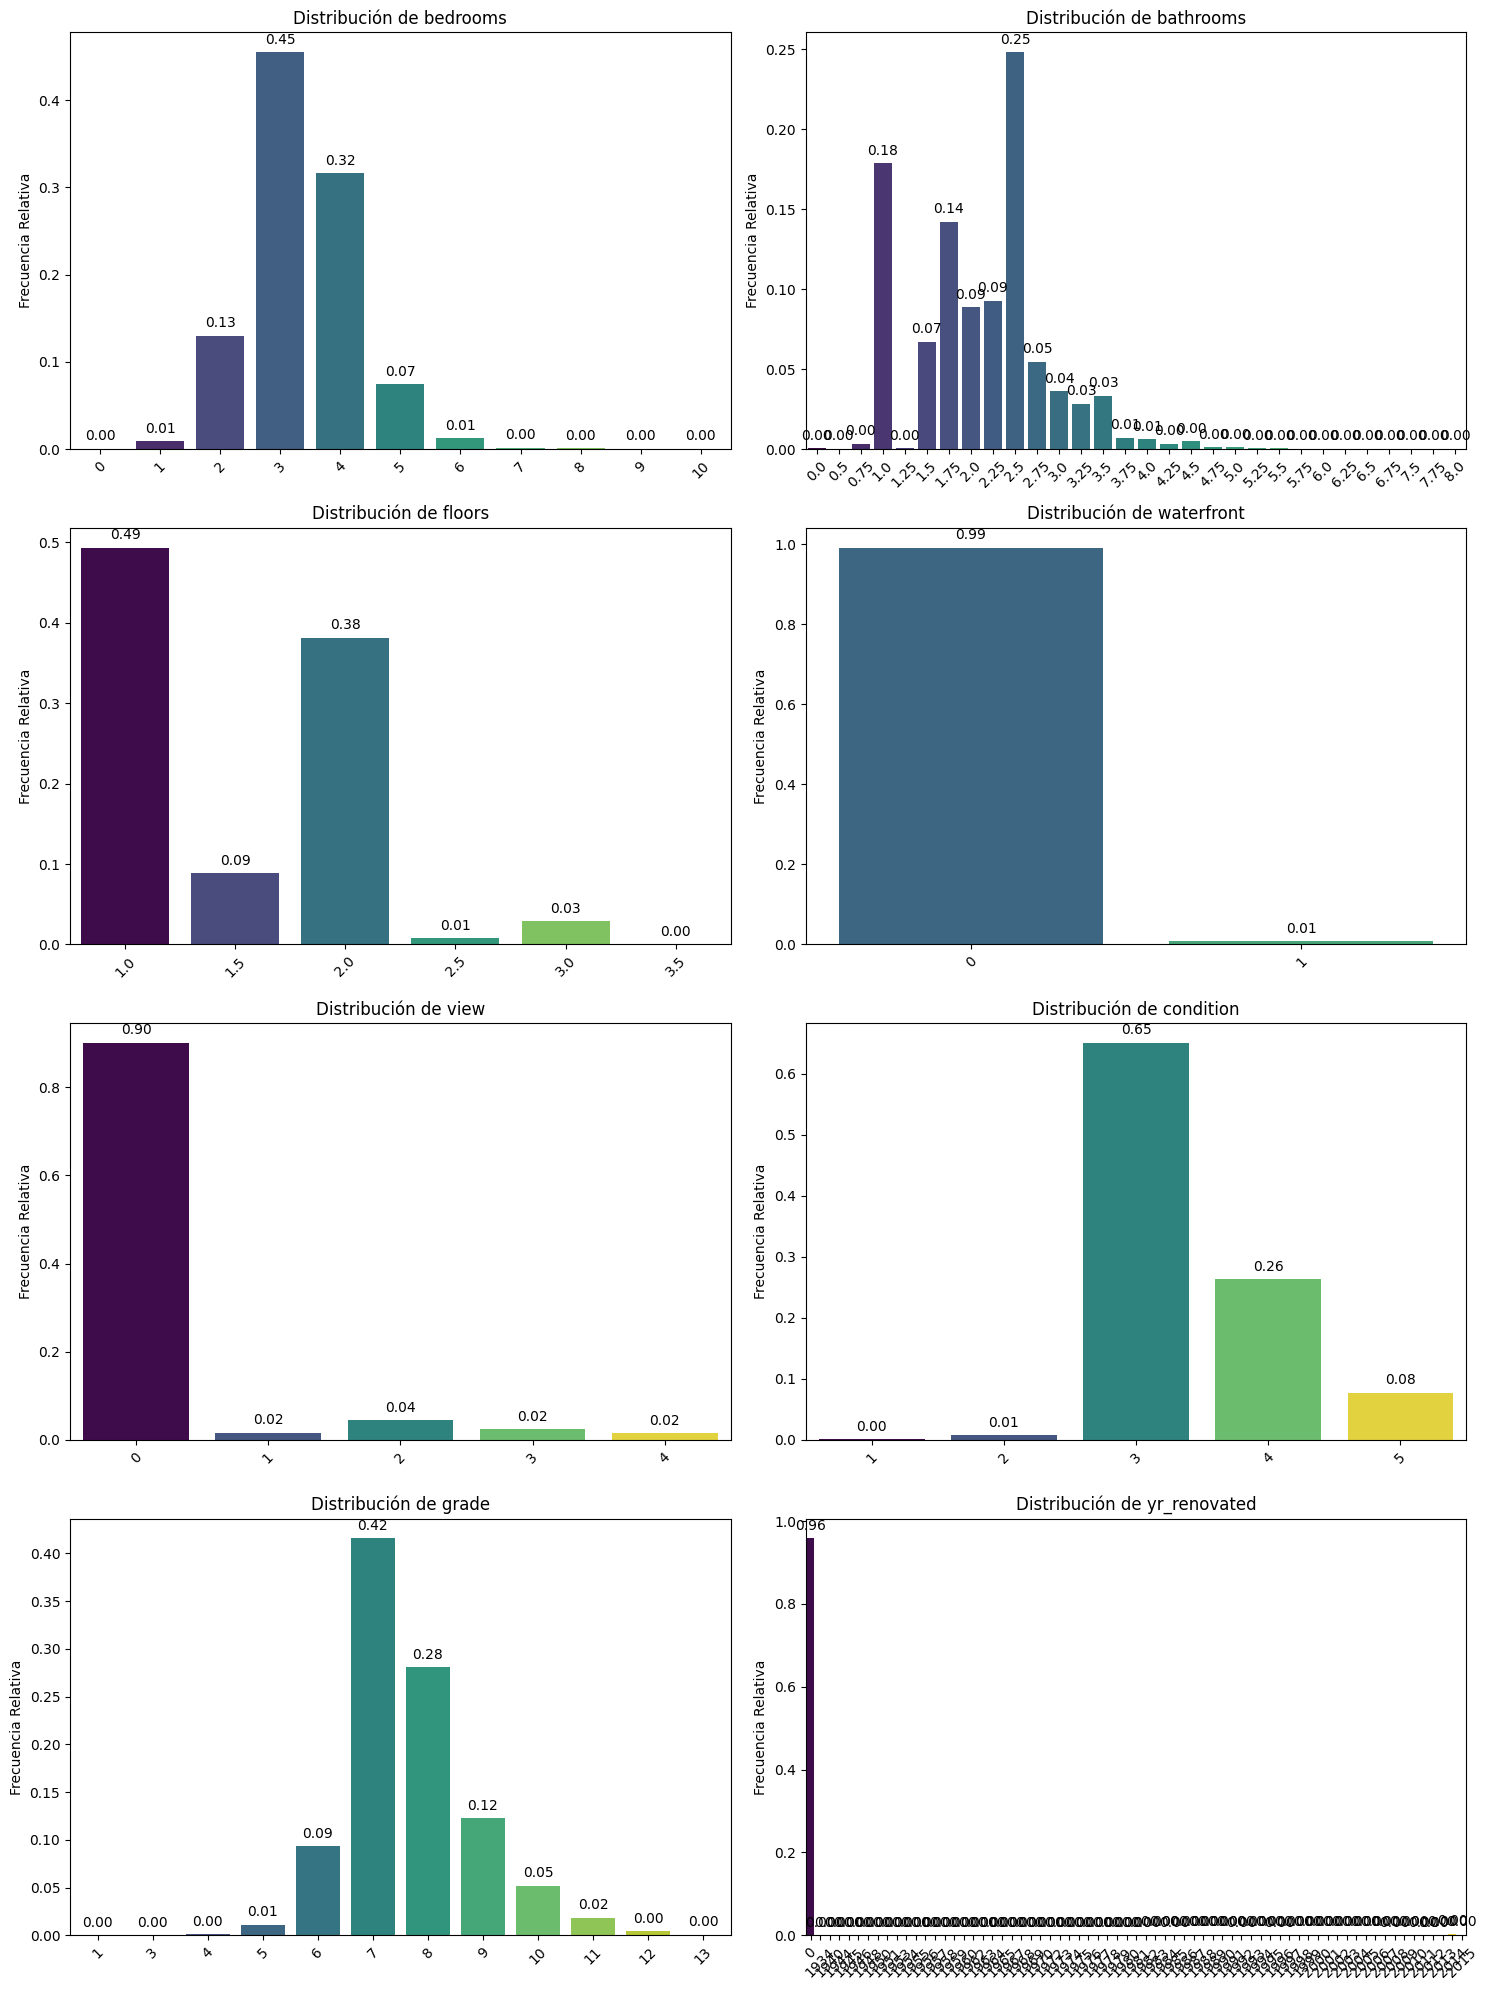

In [71]:
bt.pinta_distribucion_categoricas(df = train_set, columnas_categoricas=cat_features, relativa=True, mostrar_valores=True)

In each categorical variable it can be seen that there is a dominant group that concentrates most values.
- `Waterfront` = 0 (it has no view of the sea) concentrates 99% of the data.
- `Yr_renovated` = 0 (it has not been renewed) concentrates 96% of the data. This variable could be converted to binary: it has been renovated (1) or not (0).
- `view` = 0 (they are not good views) concentrates 90% of the data.
- `Condition` = 3 concentrates 65% of the data.
- `Grade` = 7 concentrates 42% of the data.

#### ** FEATURES correlation **

Once the distribution of features is visualized and analyzed, let's see the correlation they have with the Target variable (Price). To know the correlation of the categorical variables with the target, we will use the `anova` correlation

In [72]:
from scipy.stats import f_oneway

anova_results = {}
for col in cat_features:
    grupos = [train_set[target][train_set[col] == valor] for valor in train_set[col].unique()]
    stats, p_value = f_oneway(*grupos)
    anova_results[col] = p_value

#Para verlo en formato Dataframe
# anova_df = pd.DataFrame(list(anova_results.items()), columns = ["Variable", "p_value"])
anova_results

{'bedrooms': 0.0,
 'bathrooms': 0.0,
 'floors': 7.6218201057e-314,
 'waterfront': 6.27440011047515e-262,
 'view': 0.0,
 'condition': 1.8764452127159177e-18,
 'grade': 0.0,
 'yr_renovated': 1.1694948220099811e-73}

All categorical features have a P_Value less than 0.05, so we can reject the null hypothesis and accept that these features have a significant statistical relationship with the target. We will use them in the model.

As for the feature `yr_renovated` we will create a new feature called` renovated both for Train Set and test set that will save the data binaryly: if the house has been reforma (1) or not (0).

In [73]:
"""Cambiar la columna 'yr_renovated' a una binaria: Ha sido reformada (1) o no (0)"""

"""Para train set"""
train_set['reformada'] = (train_set['yr_renovated'] != 0).astype(int)

"""Para test set"""
test_set['reformada'] = (test_set['yr_renovated'] != 0).astype(int)

cat_features.append('reformada')
cat_features.remove('yr_renovated')

We will also transform the feature `Bathroom` in a smaller number of groups to make it easier to understand for the model

In [74]:
"""Convertir la feature 'bathroom' en una categórica de 4 grupos"""
"""Para train set"""
train_set.loc[train_set['bathrooms'] <= 1.25, 'bathrooms_cat'] = 0  # Pocos baños
train_set.loc[(train_set['bathrooms'] > 1.25) & (train_set['bathrooms'] <= 2.5), 'bathrooms_cat'] = 1  # Estándar
train_set.loc[(train_set['bathrooms'] > 2.5) & (train_set['bathrooms'] <= 3.75), 'bathrooms_cat'] = 2  # Grandes
train_set.loc[train_set['bathrooms'] > 3.75, 'bathrooms_cat'] = 3  # Lujo

"""Para test set"""
test_set.loc[test_set['bathrooms'] <= 1.25, 'bathrooms_cat'] = 0  # Pocos baños
test_set.loc[(test_set['bathrooms'] > 1.25) & (test_set['bathrooms'] <= 2.5), 'bathrooms_cat'] = 1  # Estándar
test_set.loc[(test_set['bathrooms'] > 2.5) & (test_set['bathrooms'] <= 3.75), 'bathrooms_cat'] = 2  # Grandes
test_set.loc[test_set['bathrooms'] > 3.75, 'bathrooms_cat'] = 3  # Lujo

cat_features.append('bathrooms_cat')

In [75]:
cat_features.remove('bathrooms')

We join the selected features in the `selected_features` variable as the best based on the correlation they have with both numerical and categorical price

In [77]:
selected_features = pearson_num_features + cat_features

## **Creation of the model**
Once we have analyzed and selected all features for our model, we will pass with the creation of the Predictor Price model. For this process we will perform a **Cross-Validation** between 3 different models and we will stay with the best metric. Our main metric will be the **RMSE**

In [ ]:
"""Train set division"""
x_train = train_set.drop(columns = target, axis = 1)
y_train = train_set[target]

"""Test set division"""
x_test = test_set.drop(columns = target, axis = 1)
y_test = test_set[target]

### **Model comparison**
To get the best possible model we will use 3 different models:
- Random Forest Regressor
- XGBoost Regressor
- Catboost Regressor

In [82]:
rf_reg = RandomForestRegressor(random_state=42, max_depth = 10)
xgb_reg = XGBRegressor(random_state = 42, max_depth = 10)
cat_reg = CatBoostRegressor(random_state=42, max_depth=10, verbose=0)

#### **Models with all features**
First we will perform the Cross-Validation with all the dataset features.

In [83]:
original_features = train_set.columns.to_list()

In [84]:
original_features.remove(target)
original_features.remove('reformada')

In [85]:
original_features.remove('bathrooms_cat')

In [86]:
original_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [87]:
models = [('RF_reg', rf_reg),
          ('XGB_reg', xgb_reg),
          ('Catboost_reg', cat_reg)]

results = []

for name, model in models:
    print(f"Evaluando el modelo: {name}")

    x_train_model = x_train[original_features]
    x_test_model = x_test[original_features]

    cv_rmse = np.sqrt(-cross_val_score(model, x_train_model, y_train, cv=5, scoring='neg_mean_squared_error'))
    
    model.fit(x_train_model, y_train)
    
    y_pred = model.predict(x_test_model)
    
    # Cálculo de MAE
    mae = mean_absolute_error(y_test, y_pred)
    
    # Cálculo de MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test))  # Porcentaje de error medio
    
    results.append({
        'Model': name,
        'RMSE (Cross-Val)': np.mean(cv_rmse),
        'MAPE': mape,
        'MAE': mae
    })

results_df = pd.DataFrame(results)
print(results_df)

Evaluando el modelo: RF_reg
Evaluando el modelo: XGB_reg
Evaluando el modelo: Catboost_reg
          Model  RMSE (Cross-Val)  MAPE       MAE
0        RF_reg        138332.690 0.140 72720.786
1       XGB_reg        139517.530 0.127 67816.722
2  Catboost_reg        125092.499 0.116 60225.260


### **Models with selected features**
Now we will carry out the same process with the selected features.

In [88]:
selected_features

['sqft_living',
 'sqft_basement',
 'lat',
 'sqft_living15',
 'bedrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'reformada',
 'bathrooms_cat']

In [89]:
models = [('RF_reg', rf_reg),
          ('XGB_reg', xgb_reg),
          ('Catboost_reg', cat_reg)]

results = []

for name, model in models:
    print(f"Evaluando el modelo: {name}")

    x_train_model = x_train[selected_features]
    x_test_model = x_test[selected_features]

    cv_rmse = np.sqrt(-cross_val_score(model, x_train_model, y_train, cv=5, scoring='neg_mean_squared_error'))
    
    model.fit(x_train_model, y_train)
    
    y_pred = model.predict(x_test_model)
    
    # Cálculo de MAE
    mae = mean_absolute_error(y_test, y_pred)
    
    # Cálculo de MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test))  # Porcentaje de error medio
    
    results.append({
        'Model': name,
        'RMSE (Cross-Val)': np.mean(cv_rmse),
        'MAPE': mape,
        'MAE': mae
    })

results_df = pd.DataFrame(results)
print(results_df)

Evaluando el modelo: RF_reg
Evaluando el modelo: XGB_reg
Evaluando el modelo: Catboost_reg
          Model  RMSE (Cross-Val)  MAPE       MAE
0        RF_reg        162706.946 0.162 86516.556
1       XGB_reg        166916.772 0.159 85457.924
2  Catboost_reg        156864.142 0.150 80040.648


We get better results in all models using all dataset features. The best model is the `Catboost returns, with an RMSE of 125,092.5 dollars.

## Improves the best model with **Gridsearch**
Once we have the best model, we will apply a `Gridsearch` in which we will try different parameters to obtain the best possible result and thus see if it improves.

### **Grid Search with all features**

In [ ]:
catboost_model = CatBoostRegressor(random_state=42, verbose=0)

param_grid = {
    'iterations': [200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
}

grid_model = GridSearchCV(estimator=catboost_model,
                          param_grid=param_grid,
                          cv = 5,
                          scoring = 'neg_mean_squared_error')

grid_model.fit(x_train[original_features], y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001CD00ED33B0>,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [200, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='neg_mean_squared_error')

In [97]:
print("Best parameters:", grid_model.best_params_)
print("Best RMSE:", (-grid_model.best_score_)**0.5)

Best parameters: {'depth': 6, 'iterations': 1000, 'learning_rate': 0.1}
Best RMSE: 119045.6259385073


### ** Predictions against the test set **

In [ ]:
y_pred = grid_model.predict(x_test[original_features])

rmse = root_mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

RMSE: 102675.58008651157
MAE: 60623.42551526358
MAPE: 11.82723183708813%


The only metric that has improved RMSE, being this with the Gridsearch of 102,675.58 dollars.

## **Model recording**
Once we have achieved the best model, we will record it in the `models` folder to be able to use it again if necessary. To save the model we will use `Joblib`.

In [ ]:
import joblib

# Savel model
joblib.dump(grid_model.best_estimator_, 'models/catboost_model.pkl')

# Load model later
loaded_model = joblib.load('catboost_model.pkl')

# Check everything works properly
y_pred_loaded_model = loaded_model.predict(x_test[original_features])
print(f"Predicciones con el modelo cargado: {y_pred_loaded_model[:5]}")  # Muestra las primeras 5 predicciones

Predicciones con el modelo cargado: [592986.60890492 285861.78524006 333754.99426148 401826.3219303
 558707.12034682]
